# Lab-3 Template

Answer questions in the designated cells

### Quick review of different scalers  

Below simulation and graphs are provided to demonstrate difference between different scalers

- Robust scaler - provides better encoding for distributions with outliers
- Standard scaler - provides scaling for distributions close to normal
- Min-Max scaler - general scaler but with weak point in regard to outliers

You will need to install "seaborn" library in your virtual environment

In [1]:
# Uncomment below line if you need to install seaborn
!pip install seaborn

You should consider upgrading via the '/Applications/anaconda3/bin/python -m pip install --upgrade pip' command.


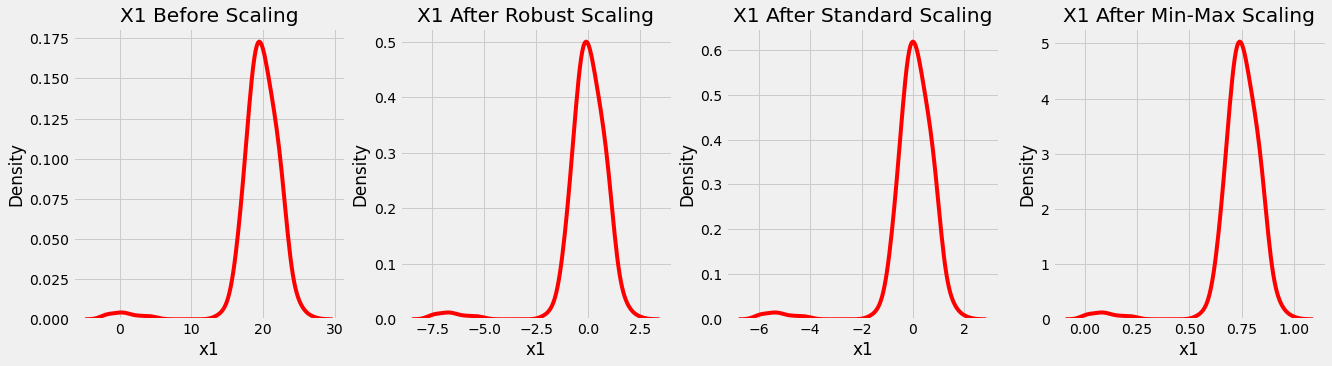

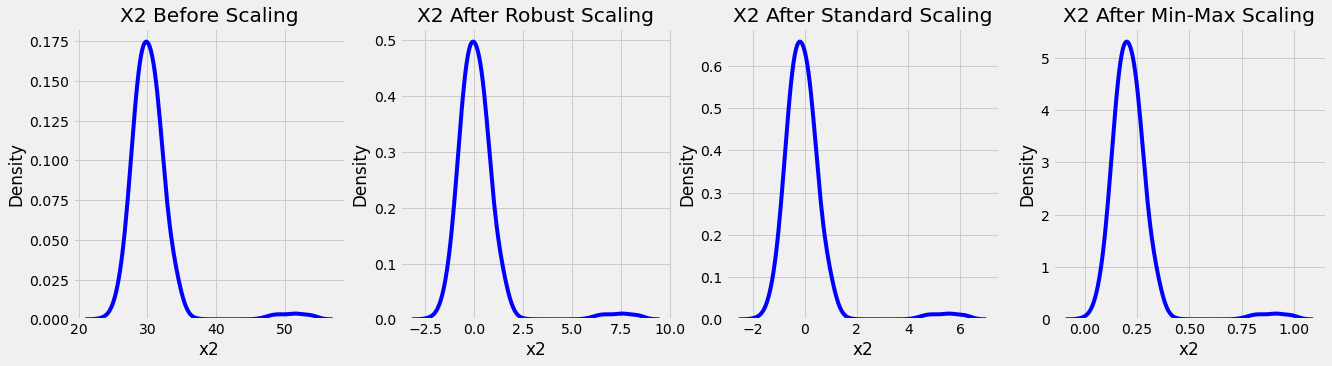

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
matplotlib.style.use('fivethirtyeight')

# data
x = pd.DataFrame({
	# Distribution with lower outliers
	'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
	# Distribution with higher outliers
	'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('X1 Before Scaling')
sns.kdeplot(x['x1'], ax = ax1, color ='r')

ax2.set_title('X1 After Robust Scaling')
sns.kdeplot(robust_df['x1'], ax = ax2, color ='r')

ax3.set_title('X1 After Standard Scaling')
sns.kdeplot(standard_df['x1'], ax = ax3, color ='r')

ax4.set_title('X1 After Min-Max Scaling')
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='r')
plt.show()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('X2 Before Scaling')
sns.kdeplot(x['x2'], ax = ax1, color ='b')

ax2.set_title('X2 After Robust Scaling')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='b')

ax3.set_title('X2 After Standard Scaling')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='b')
ax4.set_title('X2 After Min-Max Scaling')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='b')
plt.show()

## Preparation

Use dataset provided in the eLearning

In [3]:
import pandas as pd
pd.set_option('display.max_columns', 1500)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [4]:
"""
Created on Mon Mar 18 18:25:50 2019

@author: Uri Smashnov

Purpose: Analyze input Pandas DataFrame and return stats per column
Details: The function calculates levels for categorical variables and allows to analyze summarized information

To view wide table set following Pandas options:
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth',200)
"""
import pandas as pd
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

### Load data

In [5]:
#train_df = pd.read_csv('./data/SBA_loans_small.zip')
X_train = pd.read_csv('Car_Prices_Poland_train.csv')
X_test  = pd.read_csv('Car_Prices_Poland_test.csv')

In [6]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (88445, 10)
Test shape: (29482, 10)


In [7]:
X_train.isna().sum()

mark                   0
model                  0
generation_name    22551
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price                  0
dtype: int64

In [8]:
desc_df = describe_more(X_train)
desc_df

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,mark,23,object,3,13,"{'audi': 9042, 'opel': 8898, 'bmw': 8306, 'vol..."
1,model,328,object,1,16,"{'astra': 2479, 'seria-3': 2228, 'a4': 2181, '..."
2,generation_name,364,object,3,30,"{'gen-8p-2003-2012': 1179, 'gen-j-2009-2015': ..."
3,year,51,int64,4,4,"{2021: 7963, 2017: 6672, 2018: 6482, 2016: 529..."
4,mileage,27980,int64,1,7,"{1: 2809, 5: 2416, 10: 1089, 180000: 541, 2200..."
5,vol_engine,465,int64,1,4,"{1598: 7636, 1968: 6101, 1995: 4868, 1997: 400..."
6,fuel,6,object,3,8,"{'Gasoline': 46298, 'Diesel': 36212, 'LPG': 31..."
7,city,3951,object,2,24,"{'Warszawa': 5980, 'Łódź': 2498, 'Kraków': 225..."
8,province,23,object,1,24,"{'Mazowieckie': 16685, 'Śląskie': 12517, 'Wiel..."
9,price,8025,int64,3,7,"{19900: 1009, 39900: 858, 29900: 853, 18900: 8..."


Explore valid values and counts for the variable `mark` 

In [9]:
desc_df.iloc[0]["Level_Values"]

{'audi': 9042,
 'opel': 8898,
 'bmw': 8306,
 'volkswagen': 8072,
 'ford': 7216,
 'mercedes-benz': 5325,
 'renault': 5202,
 'skoda': 4412,
 'toyota': 3878,
 'peugeot': 3848,
 'volvo': 3299,
 'hyundai': 3042,
 'kia': 2828,
 'nissan': 2332,
 'mazda': 2157,
 'fiat': 2150,
 'seat': 2132,
 'citroen': 2031,
 'honda': 1620,
 'mitsubishi': 851,
 'mini': 810,
 'alfa-romeo': 535,
 'chevrolet': 459}

# Question 1 - 1 point

Replace missing values for all columns for both X_train and X_test.
Replace Na's with zero for numerical variables and with "Missing" for categorical

In [10]:
for columnName in X_train.columns:
    if (X_train[columnName].dtypes=='int64'):
        X_train[columnName].fillna(0, inplace=True)
    else:
        X_train[columnName].fillna("Missing", inplace = True)
for columnName in X_test.columns:
    if (X_test[columnName].dtypes=='int64'):
        X_test[columnName].fillna(0, inplace=True)
    else:
        X_test[columnName].fillna("Missing", inplace = True)

In [11]:
print(X_train.isna().sum())
print(X_test.isna().sum())

mark               0
model              0
generation_name    0
year               0
mileage            0
vol_engine         0
fuel               0
city               0
province           0
price              0
dtype: int64
mark               0
model              0
generation_name    0
year               0
mileage            0
vol_engine         0
fuel               0
city               0
province           0
price              0
dtype: int64


## Question 2 - 3 points

For the categorical variables listed below:  
- Use LabelEncoder to encode if number of levelsis more than 24 (including)
- Use one-hot-encoding to encode if number of levels is less than or equal to 23. You can use Pandas or `sklearn` approach
- make sure scaler is created from X_train only
- X_test will be encoded from the corresponding scaler above
- Give new columns names "Original-name"_scaled

Good starting point: https://www.guidodiepen.nl/2021/02/keeping-column-names-when-using-sklearn-onehotencoder-on-pandas-dataframe/

**Don't copy the code, only use the approach!!!**

You will need to handle situation when certain value of categorical variable doesn't appear in Training set but present in Testing set. Simple way to handle it, is to concatenate the sets. More complex way see discussion here:
https://stackoverflow.com/questions/21057621/sklearn-labelencoder-with-never-seen-before-values
You would need to add "Unknown" label, the discussion with 31 votes:
```
class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)
```        

In [12]:
len_data = len(X_train)
for col in X_train.drop(columns=['price']).columns:
  if X_train[col].dtype == 'object':
    print("Column ",col," has ",X_train[col].nunique()," values")
len_data = len(X_test)
for col in X_test.drop(columns=['price']).columns:
  if X_test[col].dtype == 'object':
    print("Column ",col," has ",X_test[col].nunique()," values")

Column  mark  has  23  values
Column  model  has  328  values
Column  generation_name  has  365  values
Column  fuel  has  6  values
Column  city  has  3951  values
Column  province  has  23  values
Column  mark  has  23  values
Column  model  has  328  values
Column  generation_name  has  364  values
Column  fuel  has  6  values
Column  city  has  2446  values
Column  province  has  18  values


In [13]:
X_train.columns

Index(['mark', 'model', 'generation_name', 'year', 'mileage', 'vol_engine',
       'fuel', 'city', 'province', 'price'],
      dtype='object')

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class CustomOneHotEncoder(BaseEstimator, TransformerMixin):

    def __init__(self, **kwargs):
        self.feature_names = []

    def fit(self, X, y=None):
        return self

    def transform(self, X):

        result = pd.get_dummies(X)
        self.column_names = result.columns

        return result

In [15]:
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        if (X_train[col].nunique() > 24):
            print("unique >= 24  column:",col)
        else:
            print("unique < 24 column:", col)
for col in X_test.columns:
    if X_test[col].dtype == 'object':
        if (X_test[col].nunique() > 24):
            print("unique >= 24  column:",col)
        else:
            print("unique < 24 column:", col)

unique < 24 column: mark
unique >= 24  column: model
unique >= 24  column: generation_name
unique < 24 column: fuel
unique >= 24  column: city
unique < 24 column: province
unique < 24 column: mark
unique >= 24  column: model
unique >= 24  column: generation_name
unique < 24 column: fuel
unique >= 24  column: city
unique < 24 column: province


In [16]:
pip install category_encoders

You should consider upgrading via the '/Applications/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [17]:
from category_encoders.one_hot import OneHotEncoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cohe=CustomOneHotEncoder()
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        if (X_train[col].nunique() >= 24):
            X_train[col]=label_encoder.fit_transform(X_train[col])
        else:
            ecohe_result=cohe.fit_transform(X_train[col])
            X_train = X_train.drop(col, 1)
            X_train=pd.concat([X_train,ecohe_result], axis = 1)
for col in X_test.columns:
    if X_test[col].dtype == 'object':
        if (X_test[col].nunique() >= 24):
            X_test[col]=label_encoder.fit_transform(X_test[col])
        else:
            ecohe_result=cohe.fit_transform(X_test[col])
            X_test = X_test.drop(col, 1)
            X_test=pd.concat([X_test,ecohe_result], axis = 1)


In [18]:
X_train.columns

Index(['model', 'generation_name', 'year', 'mileage', 'vol_engine', 'city',
       'price', 'alfa-romeo', 'audi', 'bmw', 'chevrolet', 'citroen', 'fiat',
       'ford', 'honda', 'hyundai', 'kia', 'mazda', 'mercedes-benz', 'mini',
       'mitsubishi', 'nissan', 'opel', 'peugeot', 'renault', 'seat', 'skoda',
       'toyota', 'volkswagen', 'volvo', 'CNG', 'Diesel', 'Electric',
       'Gasoline', 'Hybrid', 'LPG', '(', 'Berlin', 'Dolnośląskie',
       'Kujawsko-pomorskie', 'Lubelskie', 'Lubuskie', 'Mazowieckie',
       'Małopolskie', 'Moravian-Silesian Region', 'Niedersachsen',
       'Nordrhein-Westfalen', 'Opolskie', 'Podkarpackie', 'Podlaskie',
       'Pomorskie', 'Trenczyn', 'Warmińsko-mazurskie', 'Wiedeń',
       'Wielkopolskie', 'Zachodniopomorskie', 'Łódzkie', 'Śląskie',
       'Świętokrzyskie'],
      dtype='object')

In [19]:
X_train.columns.size

59

In [20]:
X_test.columns.size

54

## Question 3 - 1 point

Use MinMax scaler to encode numerical variables. Be careful not to scale new columns you have created as part of categorical features encoding


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
for col in X_train.drop(columns=['price']).columns:
    if (X_train[col].dtype== 'int64'):
        X_train[col]= scaler.fit_transform(X_train[col].values.reshape(-1,1))
for col in X_test.drop(columns=['price']).columns:
    if (X_test[col].dtype== 'int64'):
        X_test[col]= scaler.fit_transform(X_test[col].values.reshape(-1,1))

In [22]:
X_train.head()

,model,generation_name,year,mileage,vol_engine,city,price,alfa-romeo,audi,bmw,chevrolet,citroen,fiat,ford,honda,hyundai,kia,mazda,mercedes-benz,mini,mitsubishi,nissan,opel,peugeot,renault,seat,skoda,toyota,volkswagen,volvo,CNG,Diesel,Electric,Gasoline,Hybrid,LPG,(,Berlin,Dolnośląskie,Kujawsko-pomorskie,Lubelskie,Lubuskie,Mazowieckie,Małopolskie,Moravian-Silesian Region,Niedersachsen,Nordrhein-Westfalen,Opolskie,Podkarpackie,Podlaskie,Pomorskie,Trenczyn,Warmińsko-mazurskie,Wiedeń,Wielkopolskie,Zachodniopomorskie,Łódzkie,Śląskie,Świętokrzyskie
0,0.486239,0.030220,0.775862,0.037902,0.236316,0.138228,25000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.376147,0.450549,0.793103,0.073929,0.157895,0.083544,11900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.486239,0.030220,0.844828,0.069643,0.257368,0.680759,24598,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.079511,0.085165,0.827586,0.100000,0.258947,0.027848,41900,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0.204893,0.530220,0.862069,0.043643,0.205263,0.166835,39500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Question 4 - 2 points

Train `LinearRegression` on the Train dataset. Score Test dataset. Report performance metrics for both, Train and Test datasets.
Report following metrics:
- R-square
- Mean absolute error

In [23]:
for c in X_train:
    print(c,":",X_train.columns.get_loc(c))

model : 0
generation_name : 1
year : 2
mileage : 3
vol_engine : 4
city : 5
price : 6
alfa-romeo : 7
audi : 8
bmw : 9
chevrolet : 10
citroen : 11
fiat : 12
ford : 13
honda : 14
hyundai : 15
kia : 16
mazda : 17
mercedes-benz : 18
mini : 19
mitsubishi : 20
nissan : 21
opel : 22
peugeot : 23
renault : 24
seat : 25
skoda : 26
toyota : 27
volkswagen : 28
volvo : 29
CNG : 30
Diesel : 31
Electric : 32
Gasoline : 33
Hybrid : 34
LPG : 35
( : 36
Berlin : 37
Dolnośląskie : 38
Kujawsko-pomorskie : 39
Lubelskie : 40
Lubuskie : 41
Mazowieckie : 42
Małopolskie : 43
Moravian-Silesian Region : 44
Niedersachsen : 45
Nordrhein-Westfalen : 46
Opolskie : 47
Podkarpackie : 48
Podlaskie : 49
Pomorskie : 50
Trenczyn : 51
Warmińsko-mazurskie : 52
Wiedeń : 53
Wielkopolskie : 54
Zachodniopomorskie : 55
Łódzkie : 56
Śląskie : 57
Świętokrzyskie : 58


In [24]:
from sklearn.linear_model import LinearRegression
#y_train = X_train['price']
#X_train = X_train.iloc[-6]
y_train = X_train.iloc[:,6]
X_train = X_train.drop(['price',"("], 1)
X_test = X_test.drop('price', 1)
y_test = X_test.iloc[:,6]

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(88445, 57)
(88445,)
(29482, 53)
(29482,)


In [26]:
for col in X_train:
    if col not in X_test:
        X_test.insert(0,col,0, True)
print(X_train.shape)
print(X_test.shape)

(88445, 57)
(29482, 57)


In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(88445, 57)
(88445,)
(29482, 57)
(29482,)


In [28]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.63767523236291
-2.0358319555806013e+37


In [29]:
X_train.head()

,model,generation_name,year,mileage,vol_engine,city,alfa-romeo,audi,bmw,chevrolet,citroen,fiat,ford,honda,hyundai,kia,mazda,mercedes-benz,mini,mitsubishi,nissan,opel,peugeot,renault,seat,skoda,toyota,volkswagen,volvo,CNG,Diesel,Electric,Gasoline,Hybrid,LPG,Berlin,Dolnośląskie,Kujawsko-pomorskie,Lubelskie,Lubuskie,Mazowieckie,Małopolskie,Moravian-Silesian Region,Niedersachsen,Nordrhein-Westfalen,Opolskie,Podkarpackie,Podlaskie,Pomorskie,Trenczyn,Warmińsko-mazurskie,Wiedeń,Wielkopolskie,Zachodniopomorskie,Łódzkie,Śląskie,Świętokrzyskie
0,0.486239,0.030220,0.775862,0.037902,0.236316,0.138228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.376147,0.450549,0.793103,0.073929,0.157895,0.083544,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.486239,0.030220,0.844828,0.069643,0.257368,0.680759,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.079511,0.085165,0.827586,0.100000,0.258947,0.027848,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0.204893,0.530220,0.862069,0.043643,0.205263,0.166835,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Question 5 - 2 points

Train RidgeRegression on the Train dataset. Use `alpha=.2`. Score Test dataset. Report performance metrics for for both, Train and Test datasets. Report following metrics:
- R-square
- Mean absolute error


In [30]:
from sklearn.linear_model import Ridge
ridge = Ridge(0.2)
ridge.fit(X_train,  y_train)
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))
print(ridge.coef_)
print(ridge.intercept_)

0.6376806253598557
-4363158573081.001
[ 2.43297368e+04 -8.98395430e+03  3.53906024e+05 -7.92613454e+05
  3.34224472e+05 -3.93331332e+02  1.08008840e+04  3.78195089e+04
  2.70667455e+04 -2.40500787e+04 -3.54204262e+03 -1.90896267e+04
 -5.53571290e+03  8.80610638e+03 -2.01066125e+04 -1.95869713e+04
 -9.26773134e+03  5.51091623e+04 -4.76163998e+01 -1.54595943e+04
 -1.02758078e+04 -7.92178089e+03 -1.19623120e+02 -1.03469144e+04
 -8.73761970e+01 -8.02264803e+03 -1.47057175e+04  8.44422950e+03
  2.01192181e+04 -3.43049398e+04 -2.36116469e+04  9.44545138e+04
 -2.63431863e+04  1.07920264e+04 -2.09867672e+04 -1.02471706e+04
  7.44157942e+03  7.73861756e+03  2.49741724e+03  5.95815279e+03
  5.40629758e+03  5.73443976e+03 -2.55614090e+03 -1.59713902e+04
 -6.36054434e+04  5.12141291e+03  1.52801810e+03 -2.65687807e+03
  1.28576366e+04 -7.41825075e+04  1.04664319e+04 -1.64663225e+04
  3.52412000e+03  5.07846045e+03  9.34846594e+03  9.91536743e+03
  1.07690969e+04]
-265641.9881269598


## Question 6 - 2 points

Train LassoRegression on the Train dataset. Use `alpha=.2`. Score Test dataset. Report performance metrics for both, Train and Test datasets. Report following metrics:
- R-square
- Mean absolute error


In [31]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.2)
lasso.fit(X_train, y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test, y_test))
print(lasso.coef_)
print(lasso.intercept_)


0.6376802331439919
-4739870148832.249
[ 2.43153761e+04 -8.96727607e+03  3.53068985e+05 -7.96443801e+05
  3.34426584e+05 -3.89539893e+02  1.17997670e+04  3.88395336e+04
  2.80844475e+04 -2.30071166e+04 -2.49390085e+03 -1.80627156e+04
 -4.50123909e+03  9.81861101e+03 -1.90742923e+04 -1.85571834e+04
 -8.24065769e+03  5.60996218e+04  9.34491783e+02 -1.44181399e+04
 -9.24216904e+03 -6.88045982e+03  9.08757817e+02 -9.31918139e+03
  9.42951503e+02 -6.96755693e+03 -1.36670255e+04  9.47888138e+03
  2.11599335e+04 -1.25642131e+04 -2.08737626e+03  1.15916073e+05
 -4.89824498e+03  3.22160639e+04  5.06337345e+02 -0.00000000e+00
  2.17197781e+03  2.46926760e+03 -2.75459435e+03  6.86204398e+02
  1.38827837e+02  4.62560955e+02 -7.21720795e+03 -6.69149546e+03
 -6.40144742e+04 -1.31277133e+02 -3.73100198e+03 -7.91188601e+03
  7.59082138e+03 -7.69198111e+04  5.19948236e+03 -1.44866060e+04
 -1.74512857e+03 -1.74285514e+02  4.07167328e+03  4.63846840e+03
  5.50322485e+03]
-282032.69437936356


## Question 7 - 2 points

Review coefficients and intercept of Lasso regression.
What can you tell about the model based on the coefficients and the intercept?
Include following:
- How can you explain to your manager meaning of coefficient?
- What is the most important variable and how does it impact price? 
- What is the least important variable? How does it impact price prediction?

In [32]:
#The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable and the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant. This property of holding the other variables constant is crucial because it allows you to assess the effect of each variable in isolation from the others.

#Year, vol_engine and mileage are the most important variable and they affect the price of car the mosty. If the year goes down and it decreases the mileage, the condition got worse.

# province, city and fuel are the least important varibales because the geolocation  does not have a proper affect on car pricesand the fuel cost is not drastically changed across locations. Compare to other varibles these affect the least.

## Question 8 - 3 points

Train Polynomial regression degree 2. You will need to follow steps 1 and 2 below:
- Transform training dataset using `PolynomialFeatures` transformer
- Train linear regression model

Answer following questions:
- What is the R-square for the training dataset? 
- What is the R-square for the Testing dataset? 
- What can you conclude based on the training/testing scoring metrics?

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

lreg = LinearRegression()
lreg.fit(X_train,y_train)

poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)

LinearRegression()